# Excercise: Visualize a Manual Depth Spiral

During the SnowEx campaigns a TON of manual snow depths were collected, past surveys for hackweek showed an overhelming interest in the manual 
snow depths dataset. This tutorial shows how easy it is to get at that data in the database while learning how to build queries

**Goal**: Visualize a small subset of snow depth, ideally a full spiral (mostly cause theyre cool!)

**Approach**: 
1. Determine the necessary details for isolating manual depths
2. Find a pit where many spirals were done. 
3. Buffer on the pit location and grab all manual snow depths

## Process


In [1]:
from snowexsql.api import PointMeasurements, LayerMeasurements
instrument = 'magnaprobe'
data_type = 'depth'


### Step 1: Find a pit of interest

In [6]:
# Pick the first one we find
site_id = LayerMeasurements().all_site_ids[0]

# Query the database, we only need one point to get a site id and its geometry
site = LayerMeasurements.from_filter(site_id=site_id, limit=1)

# Print it out 
site

,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,67.0,1N1,COGM1N1_20200208,57.0,None,217.0,213.0,NaN,215.0,None,...,2020-02-08,2022-06-30 22:28:48.330383+00:00,None,11536,https://doi.org/10.5067/DUD2VZEVBJ7S,2022-06-30,None,density,None,None


### Step 2: Collect Snow Depths

In [7]:
# We import the points measurements because snow depths is a single value at single location and date
from snowexsql.api import PointMeasurements 

# Filter the results to within 100m within the point from our pit
df = PointMeasurements.from_area(pt=site.geometry[0], buffer=100)
df

,version_number,equipment,value,latitude,longitude,northing,easting,elevation,utm_zone,geom,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,1,CRREL_C,47.0,39.03453,-108.22142,4.324283e+06,740504.818149,3031.900000,12,POINT (740504.818 4324282.756),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30048,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
1,1,CRREL_C,50.0,39.03454,-108.22140,4.324284e+06,740506.515638,3032.200000,12,POINT (740506.516 4324283.919),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30049,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
2,1,CRREL_C,52.0,39.03453,-108.22138,4.324283e+06,740508.280984,3032.400000,12,POINT (740508.281 4324282.862),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30050,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
3,1,CRREL_C,48.0,39.03453,-108.22137,4.324283e+06,740509.146693,3033.200000,12,POINT (740509.147 4324282.889),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30051,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
4,1,CRREL_C,52.0,39.03454,-108.22135,4.324284e+06,740510.844183,3033.300000,12,POINT (740510.844 4324284.052),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30052,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,CRREL_C,90.0,39.03469,-108.22108,4.324301e+06,740533.709339,3035.200000,12,POINT (740533.709 4324301.416),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30154,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
107,1,CRREL_C,97.0,39.03471,-108.22110,4.324304e+06,740531.910061,3035.700000,12,POINT (740531.91 4324303.583),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30155,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
108,1,CRREL_C,107.0,39.03474,-108.22110,4.324307e+06,740531.808265,3036.100000,12,POINT (740531.808 4324306.913),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30156,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None
109,1,CRREL_C,103.0,39.03477,-108.22112,4.324310e+06,740529.975057,3035.500000,12,POINT (740529.975 4324310.19),...,2020-02-08,2022-06-30 22:56:52.635035+00:00,None,30157,https://doi.org/10.5067/9IA978JIACAR,2022-06-30,magnaprobe,depth,cm,None


### Step 3: Plot it!

Text(38.347222222222214, 0.5, 'Northing [m]')

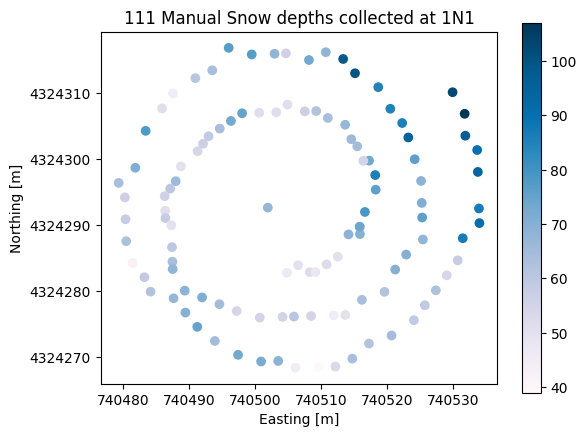

In [8]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = df.plot(column='value', legend=True, cmap='PuBu')

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax.set_title(f'{len(df.index)} Manual Snow depths collected at {site_id}')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')


**Try This:**
Go back and add a filter to reduce to just one spiral. Do you know what instrument was used to make depth spirals?


## Recap 
You just plotted snow depths and reduce the scope of the data by compounding filters on it

**You should know:**



If you don't feel comfortable with these, you are probably not alone, let's discuss it!
